# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha uma para o este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [ ]:
# Importando o dataset #

from sklearn.datasets import fetch_california_housing

# Separando em atributos (x) e saídas (y) #
california = fetch_california_housing()
x = california.data
y = california.target

In [ ]:
x.shape

(20640, 8)

# **PCA e Regressão Linear**

In [ ]:
# Importando a redução de dimensionalidade PCA #

from sklearn.decomposition import PCA

# Reduzindo a uma feature #

x_pca = PCA(n_components=1).fit_transform(x)

In [ ]:
x_pca.shape

(20640, 1)

In [ ]:
# Separando dados de treinamento e teste #

from sklearn.model_selection import train_test_split

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.20)

In [ ]:
# Importando a Regressão Linear e aplicando aos dados de teste #

from sklearn.linear_model import LinearRegression

reg_pca = LinearRegression().fit(x_train_pca, y_train_pca)
y_reg_predict_pca = reg_pca.predict(x_test_pca)

In [ ]:
# Importando as funções de erro quadrático médio e coeficiente de determinção #

from sklearn.metrics import mean_squared_error as msqe
from sklearn.metrics import r2_score as r2

print('Erro Quadrático Médio: %.5f' % msqe(y_test_pca, y_reg_predict_pca))
print('Coeficiente de Determinação: %.5f' % r2(y_test_pca, y_reg_predict_pca))

Erro Quadrático Médio: 1.34006
Coeficiente de Determinação: 0.00075


# **ICA e Lasso**


In [ ]:
# Importando a redução de dimensionalidade ICA #

from sklearn.decomposition import FastICA

# Reduzindo a uma feature #

x_ica = FastICA(n_components=1).fit_transform(x) 


In [ ]:
# Separando dados de treinamento e teste #

x_train_ica, x_test_ica, y_train_ica, y_test_ica = train_test_split(x_ica, y, test_size=0.20)

In [ ]:
# Importando o Lasso e aplicando aos dados de teste #

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars

reg_ica = Lasso().fit(x_train_ica, y_train_ica)
y_reg_predict_ica = reg_ica.predict(x_test_ica)

In [ ]:
# Cálculo dos erros #

print('Erro Quadrático Médio: %.2f' % msqe(y_test_ica, y_reg_predict_ica))
print('Coeficiente de Determinação: %.5f' % r2(y_test_ica, y_reg_predict_ica))

Erro Quadrático Médio: 1.33
Coeficiente de Determinação: -0.00014


# **TSNE e Ridge**

In [ ]:
# Importando a redução de dimensionalidade Isomap #

from sklearn.manifold import TSNE

# Reduzindo a uma feature #

x_tsne = TSNE(n_components=1).fit_transform(x)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# Separando dados de treinamento e teste #

x_train_tsne, x_test_tsne, y_train_tsne, y_test_tsne = train_test_split(x_tsne, y, test_size=0.20)

In [ ]:
# Importando o Ridge e aplicando aos dados de teste #

from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

reg_tsne = Ridge().fit(x_train_tsne, y_train_tsne)
y_reg_predict_tsne = reg_tsne.predict(x_test_tsne)

In [ ]:
# Cálculo dos erros #

print('Erro Quadrático Médio: %.2f' % msqe(y_test_tsne, y_reg_predict_tsne))
print('Coeficiente de Determinação: %.5f' % r2(y_test_tsne, y_reg_predict_tsne))

Erro Quadrático Médio: 1.27
Coeficiente de Determinação: -0.00201


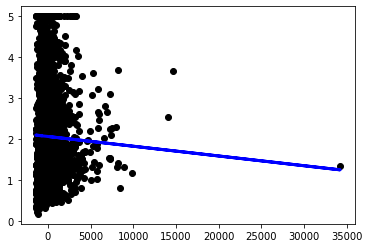

In [ ]:
# Resultado PCA e Regressão Linear

import matplotlib.pyplot as plt

plt.scatter(x_test_pca, y_test_pca, color = 'black')
plt.plot(x_test_pca, y_reg_predict_pca, color = 'blue', linewidth=3)

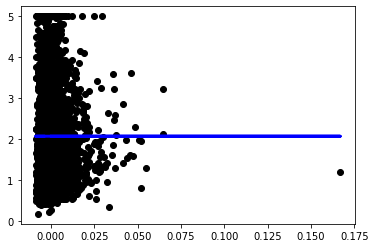

In [ ]:
# Resultado ICA e Lasso
plt.scatter(x_test_ica, y_test_ica, color = 'black')
plt.plot(x_test_ica, y_reg_predict_ica, color = 'blue', linewidth=3)

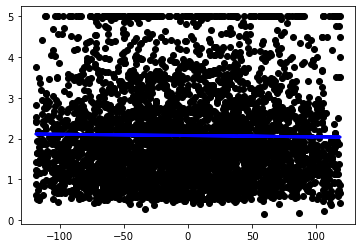

In [ ]:
# Resultado TSNE e Ridge

plt.scatter(x_test_tsne, y_test_tsne, color = 'black')
plt.plot(x_test_tsne, y_reg_predict_tsne, color = 'blue', linewidth=3)

# **Conclusão**

Analisando os gráficos e os resultados, pode-se observar que nenhuma das tentativas foram muito efetivas, pois os três casos apresentaram aproximadamente 0% de coeficiente de determinação. Além, disso, como em cada caso foi feito apenas uma vez, na hora de separar a database para teste e treino pode ter acontecido uma divisão ruim.
